In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [31]:
#Read the data
toyo = pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
#to count the different number of model availabe in the dataset
toyo[["Model"]].value_counts()

Model                                                   
TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors         107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors          83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors            79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors           70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors           43
                                                           ... 
TOYOTA Corolla 1.6 SD TERRA 4/5-Doors                         1
TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors      1
TOYOTA Corolla 1.6 SDN LINEA TERRA AUT 4/5-Doors              1
TOYOTA Corolla 1.6 Terra 5-Doors Liftback 4/5-Doors           1
 TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV                 1
Length: 372, dtype: int64

In [4]:
#numbering the columns
toyo.columns
cols = toyo.columns
for i,j in enumerate(cols):
    print(i,j, end=" \n ")

0 Id 
 1 Model 
 2 Price 
 3 Age_08_04 
 4 Mfg_Month 
 5 Mfg_Year 
 6 KM 
 7 Fuel_Type 
 8 HP 
 9 Met_Color 
 10 Color 
 11 Automatic 
 12 cc 
 13 Cylinders 
 14 Doors 
 15 Gears 
 16 Quarterly_Tax 
 17 Weight 
 18 Mfr_Guarantee 
 19 BOVAG_Guarantee 
 20 Guarantee_Period 
 21 ABS 
 22 Airbag_1 
 23 Airbag_2 
 24 Airco 
 25 Automatic_airco 
 26 Boardcomputer 
 27 CD_Player 
 28 Central_Lock 
 29 Powered_Windows 
 30 Power_Steering 
 31 Radio 
 32 Mistlamps 
 33 Sport_Model 
 34 Backseat_Divider 
 35 Metallic_Rim 
 36 Radio_cassette 
 37 Tow_Bar 
 

In [5]:
#removing the unnessary columns
toyo = toyo.drop(['Model','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
toyo

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Cylinders,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
3,4,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165
4,5,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025
1432,1439,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015
1433,1440,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015
1434,1441,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015


In [6]:
#removing the unnessary columns
toyo1 = toyo.drop(["Id","Mfg_Month","Mfg_Year","Fuel_Type","Met_Color","Color","Automatic","Cylinders"],axis=1) #0-row, 1-column

In [7]:
toyo1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,4,5,210,1165
1,13750,23,72937,90,2000,4,5,210,1165
2,13950,24,41711,90,2000,4,5,210,1165
3,14950,26,48000,90,2000,4,5,210,1165
4,13750,30,38500,90,2000,4,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,4,5,69,1025
1432,10845,72,19000,86,1300,4,5,69,1015
1433,8500,71,17016,86,1300,4,5,69,1015
1434,7250,70,16916,86,1300,4,5,69,1015


In [8]:
toyo1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,4,5,210,1165
1,13750,23,72937,90,2000,4,5,210,1165
2,13950,24,41711,90,2000,4,5,210,1165
3,14950,26,48000,90,2000,4,5,210,1165
4,13750,30,38500,90,2000,4,5,210,1170


In [9]:
#number of (rows,columns)
toyo1.shape

(1436, 9)

In [10]:
#information about non-null count and data type
toyo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
# check for missing values
toyo1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [30]:
# correlation matrix
toyo1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,NaN,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,NaN,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,NaN,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,NaN,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,NaN,0.014629,0.306996,0.335637
Doors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,NaN,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,NaN,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,NaN,0.020613,0.626134,1.000000


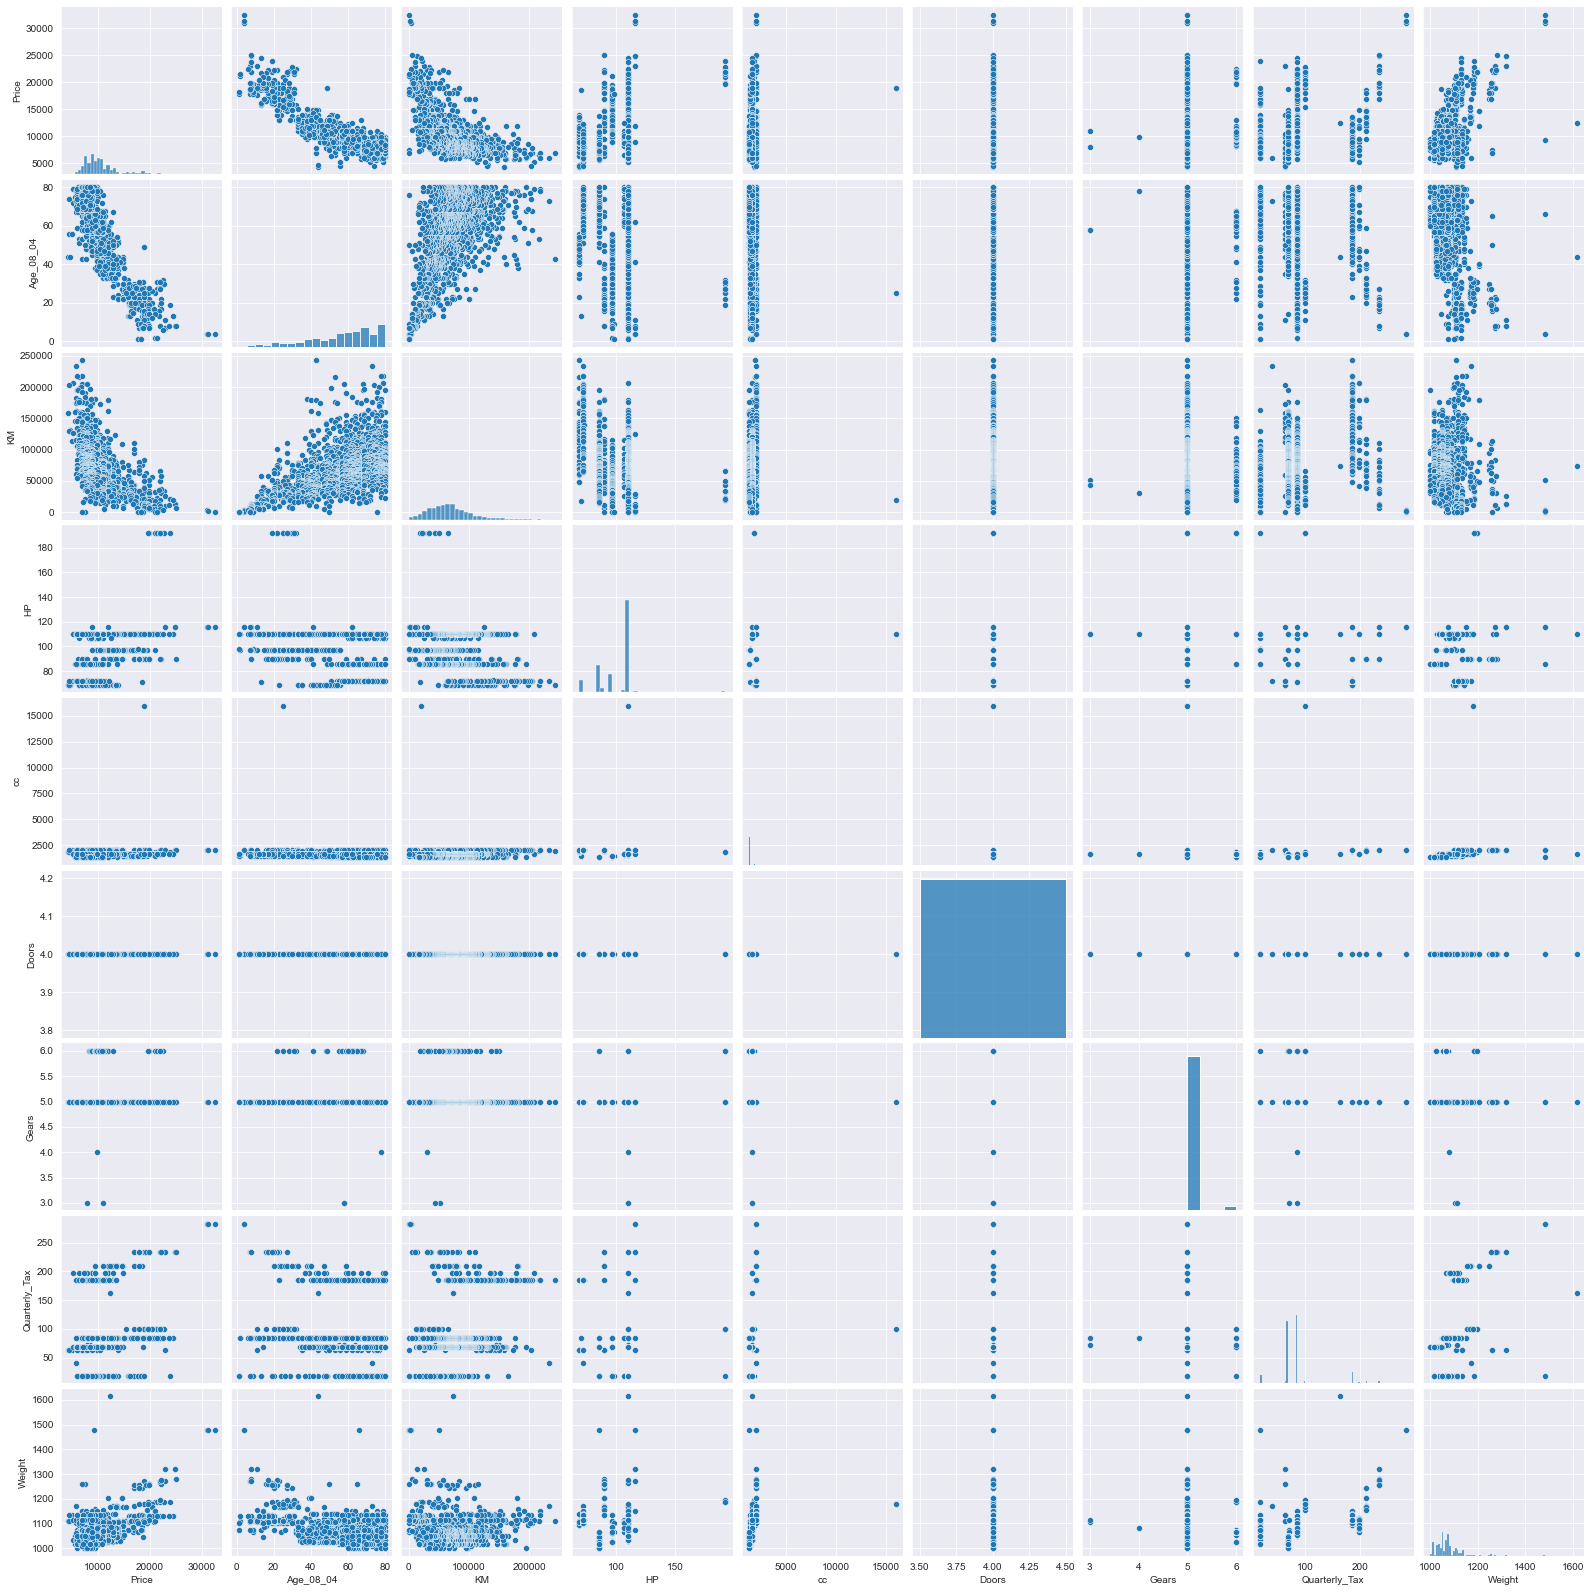

In [13]:
#scatterplot between varaible along with histograms
#format the plot background and scatter the plots for all the variables
sns.set_style(style="darkgrid")
sns.pairplot(toyo1)

<AxesSubplot:>

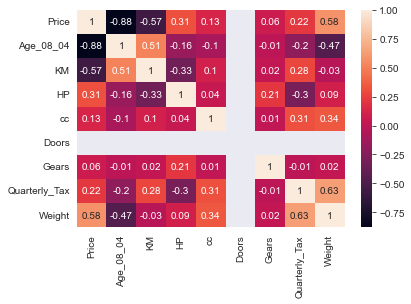

In [20]:
corr_matrix = toyo1.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

In [14]:
#numbering the columns
toyo1.columns
cols = toyo1.columns
for i,j in enumerate(cols):
    print(i,j, end=" \n ")

0 Price 
 1 Age_08_04 
 2 KM 
 3 HP 
 4 cc 
 5 Doors 
 6 Gears 
 7 Quarterly_Tax 
 8 Weight 
 

In [15]:
#preparing the model 
# build model
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit()


In [16]:
#coefficint
model.params

Intercept        -327.949416
Age_08_04        -121.658071
KM                 -0.020819
HP                 31.672841
cc                 -0.121042
Doors           -1311.797665
Gears             595.832420
Quarterly_Tax       3.953059
Weight             16.947792
dtype: float64

In [17]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.954003
Age_08_04       -46.528221
KM              -16.635958
HP               11.270379
cc               -1.344217
Doors            -3.954003
Gears             3.080822
Quarterly_Tax     3.027187
Weight           16.400980
dtype: float64 
 Intercept         8.061841e-05
Age_08_04        2.111306e-288
KM                6.123589e-57
HP                2.762121e-28
cc                1.790917e-01
Doors             8.061841e-05
Gears             2.103732e-03
Quarterly_Tax     2.512611e-03
Weight            1.612185e-55
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637625904386812, 0.8630947599996551)

In [26]:
#simple linear regression model
#t and p-Values
ml_v=smf.ols('Price~Age_08_04',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

ml_v=smf.ols('Price~KM',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

ml_v=smf.ols('Price~HP',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

ml_v=smf.ols('Price~cc',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

ml_v=smf.ols('Price~Doors',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

ml_v=smf.ols('Price~Gears',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

ml_v=smf.ols('Price~Weight',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

ml_v=smf.ols('Price~Quarterly_Tax',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

ml_v=smf.ols('Price~Weight',data = toyo1).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)


Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64
Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64
Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64
Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64
Intercept    112.115846
Doors        112.115846
dtype: float64 
 Intercept    0.0
Doors        0.0
dtype: float64
Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64
Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64
Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 
 Intercept        1.532168e-246
Quarterly_Tax     4.4073

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:57:45   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -327.9494     82.941     -3.954      0.000    -490.649    -165.250
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Doors         -1311.7977    331.764     -3.954      0.000   -1962.596    -661.000
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.57e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""